# Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from csv file and look its head

In [2]:
data = pd.read_csv("yelp.csv")

In [3]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


# Data exploration

Create a new column called "length" which will save the number of words in the text column.

In [4]:
data['length'] = data['text'].apply(len)

Using FacetGrid from the seaborn library, create a grid of 5 histograms of text length based on the star ratings.

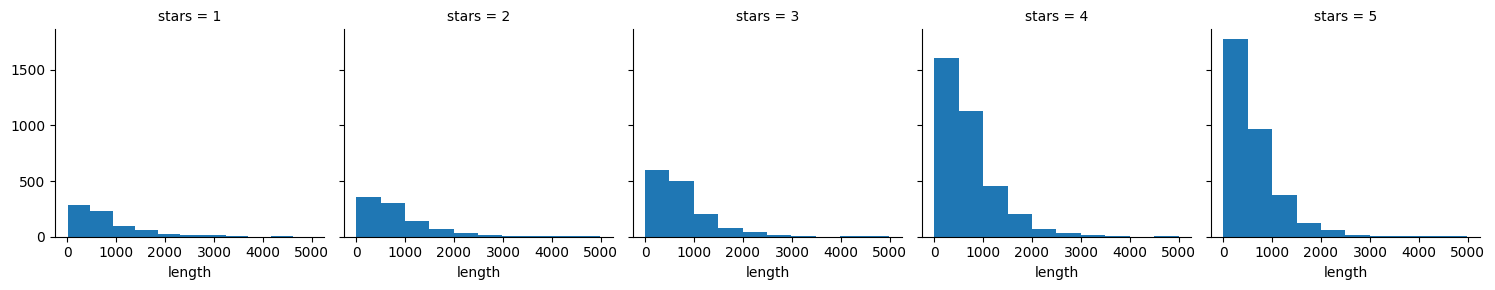

In [5]:
graph = sns.FacetGrid(data,col='stars')
graph.map(plt.hist,'length')

Create a boxplot of text length for each star category.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='stars', ylabel='length'>

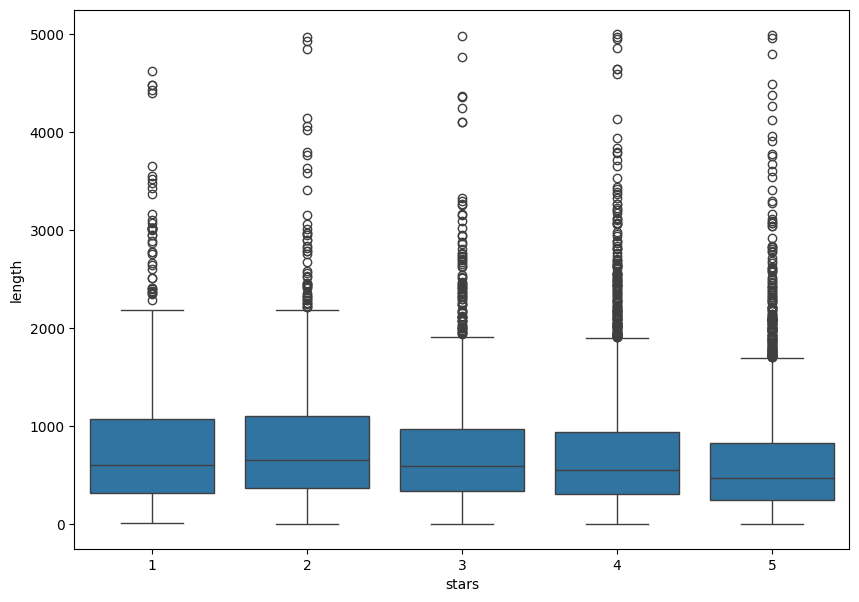

In [6]:
fig = plt.figure(figsize =(10, 7))
sns.boxplot(x='stars', y='length', data=data)

Create a countplot of the number of occurrences for each type of star rating.

<Axes: xlabel='stars', ylabel='count'>

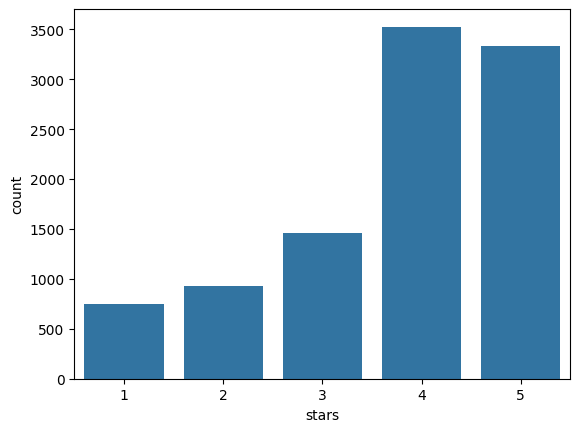

In [7]:
sns.countplot(x='stars',data=data)

Insight of df stucture

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
 10  length       10000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


Retrieve names of numeric col

In [9]:
numeric = data[['stars','cool','useful','funny','length']]

Get the mean values of the numerical columns

In [10]:
numeric_stars=numeric.groupby(['stars']).mean()
numeric_stars

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


Create correlated df on the numeric data

In [11]:
numeric_stars.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


Create a heatmap based on previously created df

<Axes: >

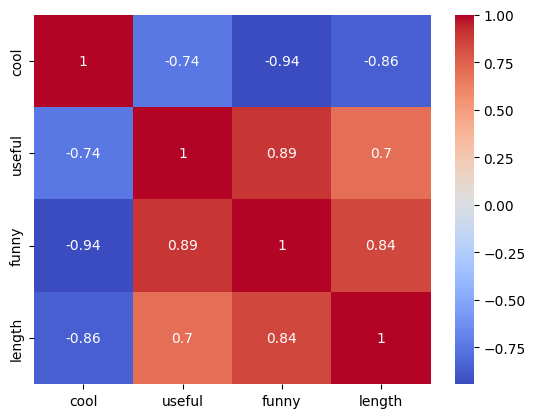

In [12]:
sns.heatmap(numeric_stars.corr(),annot=True,cmap='coolwarm')

# NLP Classification

## Data preparation

Create a df that contains the columns of yelp df, but for only the 1 or 5 star reviews.

In [13]:
yelp_class = data[(data.stars==1) | (data.stars==5)]
yelp_class

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


X = 'text' column of yelp_class.
y = 'stars' column of yelp_class. (features and target/labels)

In [ ]:
X= yelp_class['text']
y = yelp_class['stars']

Create a CountVectorizer object.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

Create matrix of (row = word) (col=text) how many times word occured in text

In [ ]:
X = cv.fit_transform(X)

Split data into training and testing data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=58)

## Training a Model

Create an instance of the estimator

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

Fit nb using the training data.

In [ ]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

Use the predict method to predict labels from X_test.

In [ ]:
predict = nb.predict(X_test)

Create a confusion matrix and classification report using these predictions and y_test

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[148  50]
 [ 40 988]]
              precision    recall  f1-score   support

           1       0.79      0.75      0.77       198
           5       0.95      0.96      0.96      1028

    accuracy                           0.93      1226
   macro avg       0.87      0.85      0.86      1226
weighted avg       0.93      0.93      0.93      1226



# Using Text Processing

## Preparation

In [ ]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

Create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()

In [ ]:
pipeline=Pipeline([('cv',CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('nb',MultinomialNB())])

Redo the train test split on the yelp_class object. Cause X was rewrote by CountVectorizer

In [ ]:
X= yelp_class['text']
y=yelp_class['stars']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=58)

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nb', MultinomialNB())])

## Predictions and Evaluation

In [ ]:
pipeline_predict = pipeline.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, pipeline_predict))
print(classification_report(y_test,pipeline_predict))

[[   0  198]
 [   0 1028]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       198
           5       0.84      1.00      0.91      1028

    accuracy                           0.84      1226
   macro avg       0.42      0.50      0.46      1226
weighted avg       0.70      0.84      0.76      1226



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
